# <font color='red'>1) Getting Started With Pandas</font>


## <font color='blue'>Anatomia de um DataFrame</font>
Um __DataFrame__ é composto por uma ou mais __Series__. Os nomes das series formam os nomes das __colunas__ e os rótulos das linhas formam o __Index__.

In [1]:
import pandas as pd

#Vizualização menor com rows = 5
meteoritos = pd.read_csv('/home/nicolas.fs/Estudos-PIBE/Repositório-GIT/pandas-workshop/data/Meteorite_Landings.csv', nrows=5)
#Vizualização completa
meteorites = pd.read_csv('/home/nicolas.fs/Estudos-PIBE/Repositório-GIT/pandas-workshop/data/Meteorite_Landings.csv')

meteoritos

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


Este comando acaba de utilizar o módulo __pandas__ para fazer a criação da tabela de Meteoritos utilizando o comando __pd.read_csv__. Com isso podemos fazer algumas análises utilizando a variável meteoritos:

In [2]:
meteoritos.name

0      Aachen
1      Aarhus
2        Abee
3    Acapulco
4     Achiras
Name: name, dtype: object

In [3]:
meteoritos.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

In [4]:
meteoritos.index

RangeIndex(start=0, stop=5, step=1)

## <font color='blue'>Criando DataFrames</font>
Podemos criar DataFrames a partir de uma variedade de fontes, como outros __objetos Python__. Veremos apenas alguns exemplos, mas podemos conferir a página da documentação para obter uma lista completa.

### Usando apenas uma linha

Do mesmo formato no qual fizemos anteriormente, utilizando o comando __pd.read__.

### Usando dados de uma API

In [5]:
import requests

response = requests.get(
    'https://data.nasa.gov/resource/gh4g-9sfh.json',
    params={'$limit': 50_000}
)

if response.ok:
    payload = response.json()
else:
    print(f'Request was not successful and returned code: {response.status_code}.')
    payload = None

Esse código está utilizando a biblioteca __requests__ para fazer uma solicitação __GET__ a uma API da NASA, pedindo um parâmetro com um __limite__ de __50.000__ registros. Se a resposta for bem-sucedida (status OK), os dados JSON são __armazenados em payload__; caso contrário, uma mensagem de erro é exibida e payload é __definido como None__.

Criaremos agora o DataFrame com os resultados de payload, sendo o comando __df.head(n)__ responsável pelo __número de rows__ que teremos:

In [6]:
import pandas as pd

df = pd.DataFrame(payload)
df.head(2)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'latitude': '50.775', 'longitude': '6.08333'}",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'latitude': '56.18333', 'longitude': '10.23333'}",NaN,NaN


## <font color='blue'>Inspecionando dados</font>
Agora que temos alguns dados, precisamos realizar uma inspeção inicial deles. Isso nos dá informações sobre a aparência dos dados, quantas linhas/colunas existem e quantos dados temos.

### Verificação da quantidade de rows e colunas

In [7]:
meteorites.shape

(45716, 10)

### Verificação do nome das colunas

In [8]:
meteorites.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass (g)', 'fall', 'year',
       'reclat', 'reclong', 'GeoLocation'],
      dtype='object')

### Verificação do tipo de dado que cada coluna informa

In [9]:
meteorites.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year            object
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

### Vizualização dos primeiros e últimos row de dados

In [10]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [11]:
meteorites.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,01/01/1990 12:00:00 AM,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,01/01/1999 12:00:00 AM,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,01/01/1939 12:00:00 AM,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,01/01/2003 12:00:00 AM,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,01/01/1976 12:00:00 AM,33.98333,-115.68333,"(33.98333, -115.68333)"


### Pegando informações

In [12]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


## <font color='blue'>Extraindo subconjuntos</font>
Uma parte crucial do trabalho com DataFrames é extrair subconjuntos de dados: encontrar linhas que atendam a um determinado conjunto de critérios, isolar colunas elinhas de interesse, etc. Esta seção será muito importante para muitas tarefas de análise.

### Selecionando colunas

In [13]:
meteorites.name

0            Aachen
1            Aarhus
2              Abee
3          Acapulco
4           Achiras
            ...    
45711    Zillah 002
45712        Zinder
45713          Zlin
45714     Zubkovsky
45715    Zulu Queen
Name: name, Length: 45716, dtype: object

Podemos selecionar múltiplas colunas de uma vez:

In [14]:
meteorites[['name','mass (g)']]

,name,mass (g)
0,Aachen,21.0
1,Aarhus,720.0
2,Abee,107000.0
3,Acapulco,1914.0
4,Achiras,780.0
...,...,...
45711,Zillah 002,172.0
45712,Zinder,46.0
45713,Zlin,3.3
45714,Zubkovsky,2167.0


### Selecionando linhas

In [15]:
meteorites[100:104]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
100,Benton,5026,Valid,LL6,2840.0,Fell,01/01/1949 12:00:00 AM,45.95000,-67.55000,"(45.95, -67.55)"
101,Berduc,48975,Valid,L6,270.0,Fell,01/01/2008 12:00:00 AM,-31.91000,-58.32833,"(-31.91, -58.32833)"
102,Béréba,5028,Valid,Eucrite-mmict,18000.0,Fell,01/01/1924 12:00:00 AM,11.65000,-3.65000,"(11.65, -3.65)"
103,Berlanguillas,5029,Valid,L6,1440.0,Fell,01/01/1811 12:00:00 AM,41.68333,-3.80000,"(41.68333, -3.8)"


### Indexando
Usamos __iloc[]__ para selecionar linhas e colunas por suas posições

In [16]:
meteorites.iloc[100:104,[0,3,4,6]]

,name,recclass,mass (g),year
100,Benton,LL6,2840.0,01/01/1949 12:00:00 AM
101,Berduc,L6,270.0,01/01/2008 12:00:00 AM
102,Béréba,Eucrite-mmict,18000.0,01/01/1924 12:00:00 AM
103,Berlanguillas,L6,1440.0,01/01/1811 12:00:00 AM


E usamos __loc[]__ para selecionar por nome

In [17]:
meteorites.loc[100:104, 'mass (g)':'year']

,mass (g),fall,year
100,2840.0,Fell,01/01/1949 12:00:00 AM
101,270.0,Fell,01/01/2008 12:00:00 AM
102,18000.0,Fell,01/01/1924 12:00:00 AM
103,1440.0,Fell,01/01/1811 12:00:00 AM
104,960.0,Fell,01/01/2004 12:00:00 AM


### Filtros com máscaras booleanas

Uma máscara booleana é uma estrutura semelhante a um array de valores booleanos – é uma forma de __especificar__ quais linhas/colunas queremos __selecionar (True)__ e quais __não queremos (False)__.

Aqui está um exemplo de uma máscara booleana para meteoritos pesando mais de 50 gramas e que foram encontrados na Terra (podemos também identificar duas formas de fazer esta análise):

In [18]:
(meteorites['mass (g)'] > 50) & (meteorites.fall == 'Found')

0        False
1        False
2        False
3        False
4        False
         ...  
45711     True
45712    False
45713    False
45714     True
45715     True
Length: 45716, dtype: bool

Um meio alternativo é usar o comando `query()` (tomar cuidado para utilizar os caracteres especiais corretamente):

In [19]:
meteorites.query("`mass (g)` > 1e6 and fall == 'Fell'")

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
29,Allende,2278,Valid,CV3,2000000.0,Fell,01/01/1969 12:00:00 AM,26.96667,-105.31667,"(26.96667, -105.31667)"
419,Jilin,12171,Valid,H5,4000000.0,Fell,01/01/1976 12:00:00 AM,44.05000,126.16667,"(44.05, 126.16667)"
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,01/01/1998 12:00:00 AM,42.25000,59.20000,"(42.25, 59.2)"
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,01/01/1948 12:00:00 AM,39.68333,-99.86667,"(39.68333, -99.86667)"
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,01/01/1947 12:00:00 AM,46.16000,134.65333,"(46.16, 134.65333)"


## <font color='blue'>Calculando estatísticas resumidas</font>
Na próxima seção, discutiremos a limpeza de dados para uma análise mais significativa de nossos conjuntos de dados; no entanto, já podemos extrair alguns insights interessantes dos dados dos meteoritos calculando estatísticas resumidas.

### Um parâmetro x outro

In [20]:
meteorites.fall.value_counts()

fall
Found    44609
Fell      1107
Name: count, dtype: int64

### Qual é a massa do meteorito médio?

In [21]:
meteorites['mass (g)'].mean()

13278.078548601512

### Analisando médias e quantis

In [22]:
meteorites['mass (g)'].quantile([0.01, 0.05, 0.5, 0.95, 0.99])

0.01        0.44
0.05        1.10
0.50       32.60
0.95     4000.00
0.99    50600.00
Name: mass (g), dtype: float64

In [23]:
meteorites['mass (g)'].median()

32.6

### Qual é o meteorito mais pesado e o mais leve
E como __mostrá-los__

In [24]:
meteorites['mass (g)'].min()

0.0

In [25]:
#Formato padrão de filtro para mostrara apenas os elementos filtrados com a condição booleana que queremos
meteorites[meteorites['mass (g)'] == 0]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
12640,Gove,52859,Relict,Relict iron,0.0,Found,01/01/1979 12:00:00 AM,-12.26333,136.83833,"(-12.26333, 136.83833)"
25557,Miller Range 090478,55953,Valid,CO3,0.0,Found,01/01/2009 12:00:00 AM,0.00000,0.00000,"(0.0, 0.0)"
31061,Österplana 048,56147,Relict,Relict OC,0.0,Found,01/01/2004 12:00:00 AM,58.58333,13.43333,"(58.58333, 13.43333)"
31062,Österplana 049,56148,Relict,Relict OC,0.0,Found,01/01/2012 12:00:00 AM,58.58333,13.43333,"(58.58333, 13.43333)"
31063,Österplana 050,56149,Relict,Relict OC,0.0,Found,01/01/2003 12:00:00 AM,58.58333,13.43333,"(58.58333, 13.43333)"
31064,Österplana 051,56150,Relict,Relict OC,0.0,Found,01/01/2006 12:00:00 AM,58.58333,13.43333,"(58.58333, 13.43333)"
31065,Österplana 052,56151,Relict,Relict OC,0.0,Found,01/01/2006 12:00:00 AM,58.58333,13.43333,"(58.58333, 13.43333)"
31066,Österplana 053,56152,Relict,Relict OC,0.0,Found,01/01/2002 12:00:00 AM,58.58333,13.43333,"(58.58333, 13.43333)"
31067,Österplana 054,56153,Relict,Relict OC,0.0,Found,01/01/2005 12:00:00 AM,58.58333,13.43333,"(58.58333, 13.43333)"
31068,Österplana 055,56154,Relict,Relict OC,0.0,Found,01/01/2008 12:00:00 AM,58.58333,13.43333,"(58.58333, 13.43333)"


In [26]:
meteorites['mass (g)'].max()

60000000.0

In [27]:
Maior = meteorites[meteorites['mass (g)'] == 60000000.0]
Maior

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,-19.58333,17.91667,"(-19.58333, 17.91667)"


### Extraindo informações de um meteorito específico

In [28]:
meteorites.loc[meteorites['mass (g)'].idxmax()]

name                             Hoba
id                              11890
nametype                        Valid
recclass                    Iron, IVB
mass (g)                   60000000.0
fall                            Found
year           01/01/1920 12:00:00 AM
reclat                      -19.58333
reclong                      17.91667
GeoLocation     (-19.58333, 17.91667)
Name: 16392, dtype: object

### Quantos tipos diferentes de classes de meteoritos estão representados neste conjunto de dados?

In [29]:
meteorites.recclass.nunique()

466

Como por exemplo:

In [30]:
meteorites.recclass.unique()[:10]

array(['L5', 'H6', 'EH4', 'Acapulcoite', 'L6', 'LL3-6', 'H5', 'L',
       'Diogenite-pm', 'Unknown'], dtype=object)

### Obtendo algumas estatísticas resumidas sobre os próprios dados
Podemos obter estatísticas resumidas comuns para todas as colunas de uma só vez. Por padrão, serão apenas colunas numéricas, mas aqui resumiremos tudo junto:

In [31]:
meteorites.describe(include='all')

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
count,45716,45716.000000,45716,45716,4.558500e+04,45716,45425,38401.000000,38401.000000,38401
unique,45716,NaN,2,466,NaN,2,266,NaN,NaN,17100
top,Aachen,NaN,Valid,L6,NaN,Found,01/01/2003 12:00:00 AM,NaN,NaN,"(0.0, 0.0)"
freq,1,NaN,45641,8285,NaN,44609,3323,NaN,NaN,6214
mean,NaN,26889.735104,NaN,NaN,1.327808e+04,NaN,NaN,-39.122580,61.074319,NaN
std,NaN,16860.683030,NaN,NaN,5.749889e+05,NaN,NaN,46.378511,80.647298,NaN
min,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,-87.366670,-165.433330,NaN
25%,NaN,12688.750000,NaN,NaN,7.200000e+00,NaN,NaN,-76.714240,0.000000,NaN
50%,NaN,24261.500000,NaN,NaN,3.260000e+01,NaN,NaN,-71.500000,35.666670,NaN
75%,NaN,40656.750000,NaN,NaN,2.026000e+02,NaN,NaN,0.000000,157.166670,NaN


Valores NaN significam __dados ausentes__. Por exemplo, a coluna de queda contém __strings__, portanto não há valor para __média__; da mesma forma, a massa (g) é numérica, portanto não temos entradas para as estatísticas de resumo categóricas (única, superior, frequência).

# <font color='red'>2) Data Wrangling</font>

Para preparar nossos dados para análise, precisamos realizar a __Data Wrangling__. Nesta seção, aprenderemos como limpar e reformatar dados (por exemplo: renomear colunas e corrigir incompatibilidades de tipos de dados), reestruturá-los/remodelá-los e enriquecê-los (por exemplo: discretizar colunas, calcular agregações e combinar fontes de dados)

## <font color='blue'>Limpeza de dados</font>
Nesta seção, veremos como: criar renomear e eliminar colunas; conversão de tipo; e classificação. Trabalharemos com os dados de viagem de táxi de 2019 fornecidos pela NYC Open Data.

In [32]:
import pandas as pd

taxis = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
taxis.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


### Descartando colunas
Iremos utilizar como exemplo a coluna __store_and_fwd_flag__ e as colunas de ID:

In [33]:
mask = taxis.columns.str.contains('id$|store_and_fwd_flag', regex=True)
columns_to_drop = taxis.columns[mask]
columns_to_drop

Index(['vendorid', 'ratecodeid', 'store_and_fwd_flag', 'pulocationid',
       'dolocationid'],
      dtype='object')

In [34]:
taxis = taxis.drop(columns=columns_to_drop)
taxis.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


Criamos uma mascara chamada __mask__ utilizando os comandos e selecionando apenas as colunas que queriamos descartar. Após isso salvamos em `columns_to_drop` para depois assumir que __columns=columns_to_drop__ utilizando o comando `drop` para descartar as colunas.

### Renomeando colunas

In [35]:
taxis = taxis.rename(
    columns={
        'tpep_pickup_datetime': 'pickup', 
        'tpep_dropoff_datetime': 'dropoff'
    }
)
taxis.columns

Index(['pickup', 'dropoff', 'passenger_count', 'trip_distance', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge'],
      dtype='object')

### Convertendo tipos

In [36]:
taxis.dtypes

pickup                    object
dropoff                   object
passenger_count            int64
trip_distance            float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Neste caso, queremos que __pickup__ e __dropoff__ sejam __datetimes__. Podemos arrumar isto:

In [37]:
taxis[['pickup', 'dropoff']] = \
    taxis[['pickup', 'dropoff']].apply(pd.to_datetime)
taxis.dtypes

pickup                   datetime64[ns]
dropoff                  datetime64[ns]
passenger_count                   int64
trip_distance                   float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

### Criando novas colunas

In [38]:
taxis = taxis.assign(
    elapsed_time=lambda x: x.dropoff - x.pickup, # 1
    cost_before_tip=lambda x: x.total_amount - x.tip_amount,
    tip_pct=lambda x: x.tip_amount / x.cost_before_tip, # 2
    fees=lambda x: x.cost_before_tip - x.fare_amount, # 3
    avg_speed=lambda x: x.trip_distance.div(
        x.elapsed_time.dt.total_seconds() / 60 / 60
    ) # 4
)

Essas __funções lambdas__ são funções pequenas e anônimas que podem receber vários argumentos, mas só podem conter uma expressão (o valor de retorno).

No caso temos algo do tipo:

`coluna_nova = lambda x: x.coluna1 operação x.coluna2`

In [39]:
taxis.head(2)

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.9,2.5,0 days 00:34:28,39.92,0.1999,10.42,13.804642
1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.3,0.0,0 days 00:13:18,12.30,0.0000,1.80,9.022556


### Ordenando por valores
Podemos usar o método `sort_values()` 

In [40]:
taxis.sort_values(['passenger_count', 'pickup'], ascending=[True, False]).head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
9355,2019-10-24 08:19:11,2019-10-24 09:00:35,0,13.2,2,42.0,0.0,0.5,0.00,0.0,0.3,42.80,0.0,0 days 00:41:24,42.8,0.000000,0.8,19.130435
9432,2019-10-23 17:54:48,2019-10-23 18:08:56,0,1.3,1,10.0,3.5,0.5,2.85,0.0,0.3,17.15,2.5,0 days 00:14:08,14.3,0.199301,4.3,5.518868
9697,2019-10-23 17:52:10,2019-10-23 17:58:24,0,0.9,1,6.0,3.5,0.5,2.05,0.0,0.3,12.35,2.5,0 days 00:06:14,10.3,0.199029,4.3,8.663102
9633,2019-10-23 17:52:02,2019-10-23 17:58:20,0,1.0,1,6.0,3.5,0.5,1.00,0.0,0.3,11.30,2.5,0 days 00:06:18,10.3,0.097087,4.3,9.523810
9516,2019-10-23 17:48:43,2019-10-23 18:07:36,0,1.9,1,13.0,3.5,0.5,1.50,0.0,0.3,18.80,2.5,0 days 00:18:53,17.3,0.086705,4.3,6.037070


A função `sort_values` do pandas é usada para ordenar os dados em um DataFrame com base em uma ou mais colunas.

No exemplo, `['passenger_count', 'pickup']` são as colunas pelas quais o DataFrame taxis será ordenado.

O parâmetro `ascending` especifica a ordem de classificação para cada uma das colunas. __False__ significa ordem decrescente e __True__ crescente.

Enquanto `passanger_count` está __crescendo__, os que tem valores iguais estão sendo amostrados de forma __decrescente__ na coluna `pickup`.

Para escolher as linhas maiores e menores, usamos `nlargest()` e `nsmallest()`. Vejamos um exemplo olhando para as 3 viagens com maior tempo decorrido:

In [41]:
taxis.nlargest(4, 'elapsed_time')

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
7576,2019-10-23 16:52:51,2019-10-24 16:51:44,1,3.75,1,17.5,1.0,0.5,0.0,0.0,0.3,21.8,2.5,0 days 23:58:53,21.8,0.000000,4.3,0.156371
6902,2019-10-23 16:51:42,2019-10-24 16:50:22,1,11.19,2,39.5,1.0,0.5,0.0,0.0,0.3,41.3,0.0,0 days 23:58:40,41.3,0.000000,1.8,0.466682
4975,2019-10-23 16:18:51,2019-10-24 16:17:30,1,0.70,2,7.0,1.0,0.5,0.0,0.0,0.3,11.3,2.5,0 days 23:58:39,11.3,0.000000,4.3,0.029194
6550,2019-10-23 16:49:36,2019-10-24 16:47:40,1,2.54,1,11.0,1.0,0.5,2.3,0.0,0.3,17.6,2.5,0 days 23:58:04,15.3,0.150327,4.3,0.105976


In [42]:
taxis.nsmallest(4, 'total_amount')

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
7586,2019-10-23 16:52:06,2019-10-23 17:29:50,1,10.86,2,-52.0,-4.5,-0.5,0.0,-6.12,-0.3,-65.92,-2.5,0 days 00:37:44,-65.92,-0.0,-13.92,17.268551
822,2019-10-23 16:52:52,2019-10-23 16:52:54,3,0.02,3,-52.0,-4.5,-0.5,0.0,0.00,-0.3,-57.30,0.0,0 days 00:00:02,-57.30,-0.0,-5.30,36.000000
8804,2019-10-23 16:50:16,2019-10-23 17:06:08,2,0.53,4,-10.5,-1.0,-0.5,0.0,0.00,-0.3,-14.80,-2.5,0 days 00:15:52,-14.80,-0.0,-4.30,2.004202
2103,2019-10-23 16:41:17,2019-10-23 16:56:35,1,0.85,3,-10.0,-1.0,-0.5,0.0,0.00,-0.3,-14.30,-2.5,0 days 00:15:18,-14.30,-0.0,-4.30,3.333333


## <font color='blue'>Trabalhando com índices</font>

Até agora, não trabalhamos realmente com índices porque eles são apenas os números de linhas; entretanto, podemos alterar os valores que temos no índice para acessar recursos adicionais da biblioteca pandas.

### Setando e ordenando índices

Atualmente, temos um RangeIndex, mas podemos mudar para um DatetimeIndex especificando uma coluna de data e hora ao chamar `set_index()`:

In [43]:
taxis = taxis.set_index('pickup')
taxis.head(3)

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,
2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.9,2.5,0 days 00:34:28,39.92,0.199900,10.42,13.804642
2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.3,0.0,0 days 00:13:18,12.30,0.000000,1.80,9.022556
2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.8,2.5,0 days 00:12:27,13.80,0.144928,4.30,6.554217


_Obs:_ Neste modo, após colocarmos uma coluna como linha, ela não volta a ser coluna depois.

Como temos uma amostra do conjunto de dados completo, vamos classificar o índice por __ordem de horário de coleta__:

In [44]:
taxis = taxis.sort_index()

Agora podemos selecionar intervalos de nossos dados com base na data e hora da mesma forma que fizemos com os números das linhas:

In [45]:
taxis['2019-10-23 07:45':'2019-10-23 08']

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,
2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017


Quando nao especificamos o range, usamos o comando `loc[]:`

In [46]:
taxis.loc['2019-10-23 08']

,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
pickup,,,,,,,,,,,,,,,,,
2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017


### Resetando e criando novos índices

Iremos estar trabalhando com time series depois desta seção, porém, as vezes queremos resetar nosso índice para números de linhas e recolocar as colunas novamente. Podemos fazer isso utilizando o comando `reset_index()`.

Podemos também criar e nomear índices usando o comando `.index['indice 1',...,'indice n']`.

In [47]:
taxis = taxis.reset_index()
taxis.head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
0,2019-10-23 07:05:34,2019-10-23 08:03:16,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,51.8,0.077220,1.8,15.265165
1,2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2,2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
3,2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017
4,2019-10-23 09:27:16,2019-10-23 09:33:13,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,7.8,0.000000,1.8,11.193277


In [48]:
new_index = ['teste'] * len(taxis) #O comando len serve para multiplicar pelo numero total de dados que temos
taxis.index = new_index
taxis.head()


,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
teste,2019-10-23 07:05:34,2019-10-23 08:03:16,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,51.8,0.077220,1.8,15.265165
teste,2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.000000,4.3,12.628272
teste,2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
teste,2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017
teste,2019-10-23 09:27:16,2019-10-23 09:33:13,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,7.8,0.000000,1.8,11.193277


__Exemplo utilizando um formato ordinal:__

In [49]:
new_index = [f'{i+1}º' for i in range(len(taxis))]
taxis.index = new_index
taxis.head()

,pickup,dropoff,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
1º,2019-10-23 07:05:34,2019-10-23 08:03:16,3,14.68,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0,0 days 00:57:42,51.8,0.077220,1.8,15.265165
2º,2019-10-23 07:48:58,2019-10-23 07:52:09,1,0.67,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5,0 days 00:03:11,8.8,0.000000,4.3,12.628272
3º,2019-10-23 08:02:09,2019-10-24 07:42:32,1,8.38,1,32.0,1.0,0.5,5.5,0.0,0.3,41.8,2.5,0 days 23:40:23,36.3,0.151515,4.3,0.353989
4º,2019-10-23 08:18:47,2019-10-23 08:36:05,1,2.39,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017
5º,2019-10-23 09:27:16,2019-10-23 09:33:13,2,1.11,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0,0 days 00:05:57,7.8,0.000000,1.8,11.193277



## <font color='blue'>Dados remodelados</font>

O taxi dataset que estamos trabalhando está em um formato propício para uma análise. Mas isto não é sempre o caso. Vamos agora ver o TSA traveler throughput data, no qual compara as taxas de transferencia de 2021 em um mesmo dia para os anos de 2020 e 2019:

In [50]:
tsa = pd.read_csv('/home/nicolas.fs/Estudos-PIBE/Repositório-GIT/pandas-workshop/data/tsa_passenger_throughput.csv', parse_dates=['Date'])
tsa

,Date,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
0,2021-05-14,1716561.0,250467,2664549
1,2021-05-13,1743515.0,234928,2611324
2,2021-05-12,1424664.0,176667,2343675
3,2021-05-11,1315493.0,163205,2191387
4,2021-05-10,1657722.0,215645,2512315
...,...,...,...,...
360,2020-05-19,NaN,190477,2312727
361,2020-05-18,NaN,244176,2615691
362,2020-05-17,NaN,253807,2620276
363,2020-05-16,NaN,193340,2091116


Agora iremos renomear as colunas para poder trabalhar com a remodelagem:

In [51]:
tsa = tsa.rename(columns=lambda x: x.lower().split()[0])
tsa

,date,2021,2020,2019
0,2021-05-14,1716561.0,250467,2664549
1,2021-05-13,1743515.0,234928,2611324
2,2021-05-12,1424664.0,176667,2343675
3,2021-05-11,1315493.0,163205,2191387
4,2021-05-10,1657722.0,215645,2512315
...,...,...,...,...
360,2020-05-19,NaN,190477,2312727
361,2020-05-18,NaN,244176,2615691
362,2020-05-17,NaN,253807,2620276
363,2020-05-16,NaN,193340,2091116


### Melting

Melting nos ajuda a converter os dados em um formato longo, podendo ter todos os dados de taxas de transferência do viajante em uma única coluna em linhas diferentes para cada ano:

In [52]:
tsa_melted = tsa.melt(
    id_vars='date', # column that uniquely identifies a row (can be multiple)
    var_name='year', # name for the new column created by melting
    value_name='travelers' # name for new column containing values from melted columns
)
tsa_melted

,date,year,travelers
0,2021-05-14,2021,1716561.0
1,2021-05-13,2021,1743515.0
2,2021-05-12,2021,1424664.0
3,2021-05-11,2021,1315493.0
4,2021-05-10,2021,1657722.0
...,...,...,...
1090,2020-05-19,2019,2312727.0
1091,2020-05-18,2019,2615691.0
1092,2020-05-17,2019,2620276.0
1093,2020-05-16,2019,2091116.0


_Obs:_ Podemos usar o comando `.sample(n)` caso queiramos em uma ordem aleatória.

Basicamente isso fez com que agora tenhamos mais linhas, pois temos o número de viajantes relacionados a cada ano para cada data, ao invés de várias colunas referente a cada ano para a data específica em uma só linha.

Para converter isso em uma série temporal de produtividade de viajantes, precisamos substituir o ano na __coluna de data__ pelo ano na __coluna de ano__. Caso contrário, estaremos marcando os números dos anos anteriores com o ano errado.

In [53]:
tsa_melted = tsa_melted.assign(
    date=lambda x: pd.to_datetime(x.year + x.date.dt.strftime('-%m-%d'))
)
tsa_melted

,date,year,travelers
0,2021-05-14,2021,1716561.0
1,2021-05-13,2021,1743515.0
2,2021-05-12,2021,1424664.0
3,2021-05-11,2021,1315493.0
4,2021-05-10,2021,1657722.0
...,...,...,...
1090,2019-05-19,2019,2312727.0
1091,2019-05-18,2019,2615691.0
1092,2019-05-17,2019,2620276.0
1093,2019-05-16,2019,2091116.0


Isso nos leva a alguns __valores nulos__:

In [54]:
tsa_melted.sort_values('date').tail(3)

,date,year,travelers
136,2021-12-29,2021,NaN
135,2021-12-30,2021,NaN
134,2021-12-31,2021,NaN


Eles podem ser retirados utilizando o método `dropna()`:

In [55]:
tsa_melted = tsa_melted.dropna()
tsa_melted.sort_values('date').tail(3)

,date,year,travelers
2,2021-05-12,2021,1424664.0
1,2021-05-13,2021,1743515.0
0,2021-05-14,2021,1716561.0


### Pivô

Usando o melted data, podemos pivotar os dados para compará-los em dias específicos durantes os diferentes anos:

In [56]:
tsa_pivoted = tsa_melted\
    .query('date.dt.month == 3 and date.dt.day <= 10')\
    .assign(day_in_march=lambda x: x.date.dt.day)\
    .pivot(index='year', columns='day_in_march', values='travelers')
tsa_pivoted

day_in_march,1,2,3,4,5,6,7,8,9,10
year,,,,,,,,,,
2019,2257920.0,1979558.0,2143619.0,2402692.0,2543689.0,2156262.0,2485430.0,2378673.0,2122898.0,2187298.0
2020,2089641.0,1736393.0,1877401.0,2130015.0,2198517.0,1844811.0,2119867.0,1909363.0,1617220.0,1702686.0
2021,1049692.0,744812.0,826924.0,1107534.0,1168734.0,992406.0,1278557.0,1119303.0,825745.0,974221.0


### Transposição

O atributo de transposição `T` prove uma maneira rapida de inverter linhas e colunas.

In [57]:
tsa_pivoted.T

year,2019,2020,2021
day_in_march,,,
1,2257920.0,2089641.0,1049692.0
2,1979558.0,1736393.0,744812.0
3,2143619.0,1877401.0,826924.0
4,2402692.0,2130015.0,1107534.0
5,2543689.0,2198517.0,1168734.0
6,2156262.0,1844811.0,992406.0
7,2485430.0,2119867.0,1278557.0
8,2378673.0,1909363.0,1119303.0
9,2122898.0,1617220.0,825745.0


### Mesclando

Tipicamente observamos mudanças em viagens aéreas durantes os feriados, então podemos __adicionar mais informações__ sobre as datas em nosso dataset provendo um maior contexto. O arquivo __holidays.csv__ contém alguns feriados importantes nos Estados Unidos.

In [58]:
holidays = pd.read_csv('/home/nicolas.fs/Estudos-PIBE/Repositório-GIT/pandas-workshop/data/holidays.csv', parse_dates=True, index_col='date')
holidays.loc['2019']

,holiday
date,
2019-01-01,New Year's Day
2019-05-27,Memorial Day
2019-07-04,July 4th
2019-09-02,Labor Day
2019-11-28,Thanksgiving
2019-12-24,Christmas Eve
2019-12-25,Christmas Day
2019-12-31,New Year's Eve


Podemos agora mesclar os feriados com o dataset de viagens providenciando mais informação para nossa análise:

In [59]:
tsa_melted_holidays = tsa_melted\
    .merge(holidays, left_on='date', right_index=True, how='left')\
    
tsa_melted_holidays.head()

,date,year,travelers,holiday
0,2021-05-14,2021,1716561.0,NaN
1,2021-05-13,2021,1743515.0,NaN
2,2021-05-12,2021,1424664.0,NaN
3,2021-05-11,2021,1315493.0,NaN
4,2021-05-10,2021,1657722.0,NaN


Podemos agora procurar estes feriados pelos índices ou pelas datas:

In [60]:
result = tsa_melted_holidays.loc[[863]]
result

,date,year,travelers,holiday
863,2019-01-01,2019,2126398.0,New Year's Day


In [61]:
date_to_find = '2019-07-04'
result = tsa_melted_holidays.loc[tsa_melted_holidays['date'] == date_to_find]
result

,date,year,travelers,holiday
1044,2019-07-04,2019,2345846.0,July 4th


_Obs:_ Quando você usa um único par de colchetes `[]` com `.loc` ou `.iloc`, o resultado é uma Série __(pd.Series)__ se você está selecionando uma única linha ou coluna.

_Obs:_ Quando você usa um duplo par de colchetes `[[]]`, você está criando uma lista de rótulos (mesmo que seja um único rótulo) e isso garante que o resultado seja um DataFrame __(pd.DataFrame)__, não importa quantas linhas ou colunas você esteja selecionando.

Podemos dar um passo adiante, marcando alguns dias antes e depois de cada feriado como parte do feriado. Isso tornaria mais fácil comparar as viagens de férias ao longo dos anos e procurar qualquer aumento nas viagens durante os feriados:

In [62]:
tsa_melted_holiday_travel = tsa_melted_holidays.assign(
    holiday=lambda x:
        x.holiday\
            .fillna(method='ffill', limit=1)\
            .fillna(method='bfill', limit=2)
)

In [63]:
tsa_melted_holiday_travel.query(
    'year == "2019" and '
    '(holiday == "Thanksgiving" or holiday.str.contains("Christmas"))'
)

,date,year,travelers,holiday
868,2019-12-27,2019,2575985.0,Christmas Day
869,2019-12-26,2019,2470786.0,Christmas Day
870,2019-12-25,2019,2582580.0,Christmas Day
871,2019-12-24,2019,2552194.0,Christmas Eve
872,2019-12-23,2019,1937235.0,Christmas Eve
895,2019-11-30,2019,2591470.0,Thanksgiving
896,2019-11-29,2019,2882915.0,Thanksgiving
897,2019-11-28,2019,2648268.0,Thanksgiving
898,2019-11-27,2019,1968137.0,Thanksgiving



## <font color='blue'>Agrupamentos e agregações</font>

Após reformatar e limpar nossos dados, podemos fazer agregações para resumi-los de várias maneiras. Nesta seção, iremos explorar isso utilizando tabelas dinâmicas, crosstabs, e agrupamentos por operações para agregar os dados.

### Tabelas dinâmicas

Podemos construir uma tabela dinâmica para comparar as viagens de feriado durante os anos em nosso dataset:

In [64]:
tsa_melted_holiday_travel.pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum'
)

holiday,Christmas Day,Christmas Eve,July 4th,Labor Day,Memorial Day,New Year's Day,New Year's Eve,Thanksgiving
year,,,,,,,,
2019,7629351.0,4489429.0,10074186.0,8235480.0,9779067.0,6673612.0,4525584.0,10090790.0
2020,3029841.0,2037643.0,2673335.0,2945936.0,1134233.0,7163127.0,2038102.0,3416898.0
2021,NaN,NaN,NaN,NaN,NaN,3326160.0,NaN,NaN


Os valores `NaN` na tabela dinâmica ocorrem porque __não há dados__ disponíveis para esses feriados em certos anos. 

Podemos usar o comando `pct_change()` neste resultado para ver quais períodos de viagens de férias tiveram a maior mudança nas viagens, ou seja, o comando é uma função que calcula a mudança percentual entre os __elementos consecutivos__ ao longo de uma determinada dimensão do DataFrame.

__Primeiro, um exemplo prático para entender:__

In [65]:
import pandas as pd

# Exemplo de dados
data = {
    'day': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04'],
    'travelers': [1000, 1100, 1050, 1150]
}
df = pd.DataFrame(data)
df['day'] = pd.to_datetime(df['day'])
df.set_index('day', inplace=True)

# Calculando a mudança percentual
df['pct_change'] = df['travelers'].pct_change()
print(df)


            travelers  pct_change
day                              
2024-01-01       1000         NaN
2024-01-02       1100    0.100000
2024-01-03       1050   -0.045455
2024-01-04       1150    0.095238


Cálculos Detalhados

_2024-01-01: Não há valor anterior, então o resultado é NaN._

_2024-01-02: (1100-1000)/1000_

_2024-01-03: (1050-1100)/1100_

_2024-01-04: (1150-1050)/1050_

__Agora, vamos utilizar o DataFrame que possuímos para fazer nossas análises:__

In [66]:
tsa_melted_holiday_travel.pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum'
).pct_change()

holiday,Christmas Day,Christmas Eve,July 4th,Labor Day,Memorial Day,New Year's Day,New Year's Eve,Thanksgiving
year,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,-0.60287,-0.546124,-0.734635,-0.642287,-0.884014,0.073351,-0.549649,-0.661384
2021,0.00000,0.000000,0.000000,0.000000,0.000000,-0.535655,0.000000,0.000000


Vamos fazer uma última tabela dinâmica com subtotais de colunas e linhas, junto com algumas melhorias de formatação. Primeiro, definimos uma opção de exibição para todos os carros alegóricos:

In [67]:
pd.set_option('display.float_format', '{:,.0f}'.format)

A seguir, agrupamos a véspera de Natal e o dia do Natal, e da mesma forma para a véspera e o dia do Ano Novo, e criamos a tabela dinâmica:

In [68]:
import numpy as np

tsa_melted_holiday_travel.assign(
    holiday=lambda x: np.where(
        x.holiday.str.contains('Christmas|New Year', regex=True), 
        x.holiday.str.replace('Day|Eve', '', regex=True).str.strip(), 
        x.holiday
    )
).pivot_table(
    index='year', columns='holiday', 
    values='travelers', aggfunc='sum', 
    margins=True, margins_name='Total'
)

holiday,Christmas,July 4th,Labor Day,Memorial Day,New Year's,Thanksgiving,Total
year,,,,,,,
2019,"12,118,780","10,074,186","8,235,480","9,779,067","11,199,196","10,090,790","61,497,499"
2020,"5,067,484","2,673,335","2,945,936","1,134,233","9,201,229","3,416,898","24,439,115"
2021,NaN,NaN,NaN,NaN,"3,326,160",NaN,"3,326,160"
Total,"17,186,264","12,747,521","11,181,416","10,913,300","23,726,585","13,507,688","89,262,774"


In [69]:
#Reset para prosseguir

pd.reset_option('display.float_format')

### Crosstabs

O comando `pd.crosstab()` nos da uma maneira fácil de criar uma tabela de frequência. Aqui, contamos o número de dias de viagem de baixo, médio e alto volume por ano, usando a função `pd.cut()` para criar três compartimentos de volume de viagem de largura igual:

In [70]:
pd.crosstab(
    index=pd.cut(
        tsa_melted_holiday_travel.travelers, 
        bins=3, labels=['low', 'medium', 'high']
    ),
    columns=tsa_melted_holiday_travel.year,
    rownames=['travel_volume']
)

year,2019,2020,2021
travel_volume,,,
low,0,277,54
medium,42,44,80
high,323,44,0


Podemos notar que o comando `pd.crosstab()` suporta outras agregações, desde que você passe os dados para agregar como valores e especifique a agregação com `aggfunc`. Podemos também adicionar subtotais e normalizar os dados.


### Grupo por operações

Ao invés de ter agrupamentos utilizando `mean()` ou `describe()` em nosso dataset tudo de uma vez, podemos realizar estes cálculos __por grupo__ primeiro chamando o comando `groupby()`:

In [71]:
tsa_melted_holiday_travel.groupby('year').describe(include=np.number)

travelers                                                                 
         count          mean            std        min        25%        50%   
year                                                                           
2019     365.0  2.309482e+06  285061.490784  1534386.0  2091116.0  2358007.0  \
2020     365.0  8.818674e+05  639775.194297    87534.0   507129.0   718310.0   
2021     134.0  1.112632e+06  338040.673782   468933.0   807156.0  1117391.0   

                             
             75%        max  
year                         
2019  2538384.00  2882915.0  
2020   983745.00  2507588.0  
2021  1409377.75  1743515.0

Exemplo utilizando o método `describe()` anteriormente citado:

In [72]:
tsa_melted_holiday_travel.describe(include=np.number)

,travelers
count,8.640000e+02
mean,1.520759e+06
std,8.283323e+05
min,8.753400e+04
25%,7.424175e+05
50%,1.635198e+06
75%,2.301893e+06
max,2.882915e+06


Podemos perceber que se somarmos todos os os valores em cada coluna no primeiro exemplo que estão separados por agrupamentos dos anos, irá dar o mesmo valor que temos referente a cada linha do segundo exemplo.

Os grupos também podem ser usados para realizar cálculos separados por subconjunto de dados. Por exemplo, podemos __encontrar os dias de viagem com maior e menor volume por ano__ usando `rank()`:

In [73]:
tsa_melted_holiday_travel.assign(
    travel_volume_rank=lambda x: x.groupby('year').travelers.rank(ascending=False)
).sort_values(['travel_volume_rank', 'year'])


,date,year,travelers,holiday,travel_volume_rank
896,2019-11-29,2019,2882915.0,Thanksgiving,1.0
456,2020-02-12,2020,2507588.0,NaN,1.0
1,2021-05-13,2021,1743515.0,NaN,1.0
1043,2019-07-05,2019,2795369.0,July 4th,2.0
453,2020-02-15,2020,2494922.0,NaN,2.0
...,...,...,...,...,...
395,2020-04-14,2020,90784.0,NaN,363.0
838,2019-01-26,2019,1571077.0,NaN,364.0
398,2020-04-11,2020,90510.0,NaN,364.0
835,2019-01-29,2019,1534386.0,NaN,365.0


Para saber rankings específicos podemos utilizar `.query("travel_volume_rank == n")` sendo __n__ a __posição que queremos__ :

In [74]:
tsa_melted_holiday_travel.assign(
    travel_volume_rank=lambda x: x.groupby('year').travelers.rank(ascending=False)
).sort_values(['travel_volume_rank', 'year']).query("travel_volume_rank == 47")

,date,year,travelers,holiday,travel_volume_rank
944,2019-10-12,2019,2616771.0,NaN,47.0
445,2020-02-23,2020,1919803.0,NaN,47.0
68,2021-03-07,2021,1278557.0,NaN,47.0


In [75]:
# Definindo intervalos

tsa_melted_holiday_travel.assign(
    travel_volume_rank=lambda x: x.groupby('year').travelers.rank(ascending=False)
).sort_values(['travel_volume_rank', 'year']).query("travel_volume_rank >= 1 and travel_volume_rank <= 3")

,date,year,travelers,holiday,travel_volume_rank
896,2019-11-29,2019,2882915.0,Thanksgiving,1.0
456,2020-02-12,2020,2507588.0,NaN,1.0
1,2021-05-13,2021,1743515.0,NaN,1.0
1043,2019-07-05,2019,2795369.0,July 4th,2.0
453,2020-02-15,2020,2494922.0,NaN,2.0
0,2021-05-14,2021,1716561.0,NaN,2.0
1087,2019-05-22,2019,2792670.0,NaN,3.0
442,2020-02-26,2020,2441643.0,NaN,3.0
5,2021-05-09,2021,1707805.0,NaN,3.0


Os exemplos de grupo anteriores chamaram um único método nos dados agrupados, mas usando o método `agg()` podemos especificar qualquer número deles:

In [76]:
tsa_melted_holiday_travel.assign(
    holiday_travelers=lambda x: np.where(~x.holiday.isna(), x.travelers, np.nan),
    non_holiday_travelers=lambda x: np.where(x.holiday.isna(), x.travelers, np.nan),
    year=lambda x: pd.to_numeric(x.year)
).select_dtypes(include='number').groupby('year').agg(['mean', 'std'])

travelers                holiday_travelers                  
              mean            std              mean            std   
year                                                                 
2019  2.309482e+06  285061.490784      2.365288e+06  274401.766372  \
2020  8.818674e+05  639775.194297      9.051524e+05  585649.186979   
2021  1.112632e+06  338040.673782      1.108720e+06  270648.235337   

     non_holiday_travelers                 
                      mean            std  
year                                       
2019          2.305202e+06  285803.491348  
2020          8.800073e+05  644668.293004  
2021          1.112722e+06  340266.425165

In [77]:
# Além disso, podemos especificar quais agregações realizar em cada coluna:

tsa_melted_holiday_travel.assign(
    holiday_travelers=lambda x: np.where(~x.holiday.isna(), x.travelers, np.nan),
    non_holiday_travelers=lambda x: np.where(x.holiday.isna(), x.travelers, np.nan)
).groupby('year').agg({
    'holiday_travelers': ['mean', 'std'], 
    'holiday': ['nunique', 'count']
})

holiday_travelers                holiday      
                  mean            std nunique count
year                                               
2019      2.365288e+06  274401.766372       8    26
2020      9.051524e+05  585649.186979       8    27
2021      1.108720e+06  270648.235337       1     3

## <font color='blue'>Séries temporais</font>

Ao trabalhar com dados de séries temporais, o pandas nos fornece funcionalidades adicionais não apenas para comparar as observações em nosso conjunto de dados, mas também para usar suas relações no tempo para analisar os dados. Nesta seção, veremos algumas dessas operações para selecionar intervalos de data/hora, calcular alterações ao longo do tempo, realizar cálculos de janela e reamostrar os dados para diferentes intervalos de data/hora.

### Selecionando baseado na data e no tempo

Vamos voltar ao dataset __taxis__, no qual temos anotações de data e hora para partidas e entregas. Primeiro, definiremos a coluna __dropoff__ como índice e classificaremos os dados:

In [78]:
taxis = taxis.set_index('dropoff').sort_index()

Pudemos ver anteriormente que os dados podem ser separados em data/hora:

In [79]:
taxis['2019-10-24 12':'2019-10-24 13']

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.0,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.2,4.3,0.068301


In [80]:
taxis.loc['2019-10-24 12']

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.0,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.2,4.3,0.068301


Porém, se nós quisermos olhar este range durante os dias, precisamos de outra estratégia.

Podemos extrair as entregas que aconteceram entre um determinado intervalo de tempo em qualquer dia com o método `between_time()`:

In [81]:
taxis.between_time('12:00', '13:00')

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-23 12:53:49,2019-10-23 12:35:27,5,2.49,1,13.5,1.0,0.5,2.20,0.0,0.3,20.00,2.5,0 days 00:18:22,17.8,0.123596,4.3,8.134301
2019-10-24 12:30:08,2019-10-23 13:25:42,4,0.76,2,5.0,1.0,0.5,0.00,0.0,0.3,9.30,2.5,0 days 23:04:26,9.3,0.000000,4.3,0.032938
2019-10-24 12:42:01,2019-10-23 13:34:03,2,1.58,1,7.5,1.0,0.5,2.36,0.0,0.3,14.16,2.5,0 days 23:07:58,11.8,0.200000,4.3,0.068301


Finalmente, `head()` e `tail()` nos limitam a um número de linhas, mas podemos estar interessados em linhas dentro das primeiras/últimas 2 horas (ou qualquer outro intervalo de tempo) dos dados, nesse caso, devemos usar `first()` / `last()`:

In [82]:
taxis.first('24H')

,pickup,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,elapsed_time,cost_before_tip,tip_pct,fees,avg_speed
dropoff,,,,,,,,,,,,,,,,,
2019-10-23 07:52:09,2019-10-23 07:48:58,1,0.67,2,4.5,1.0,0.5,0.00,0.0,0.3,8.80,2.5,0 days 00:03:11,8.8,0.000000,4.3,12.628272
2019-10-23 08:03:16,2019-10-23 07:05:34,3,14.68,1,50.0,1.0,0.5,4.00,0.0,0.3,55.80,0.0,0 days 00:57:42,51.8,0.077220,1.8,15.265165
2019-10-23 08:36:05,2019-10-23 08:18:47,1,2.39,2,12.5,1.0,0.5,0.00,0.0,0.3,16.80,2.5,0 days 00:17:18,16.8,0.000000,4.3,8.289017
2019-10-23 09:33:13,2019-10-23 09:27:16,2,1.11,2,6.0,1.0,0.5,0.00,0.0,0.3,7.80,0.0,0 days 00:05:57,7.8,0.000000,1.8,11.193277
2019-10-23 09:49:31,2019-10-23 09:47:25,2,0.47,2,52.0,4.5,0.5,0.00,0.0,0.3,59.80,2.5,0 days 00:02:06,59.8,0.000000,7.8,13.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-24 00:00:00,2019-10-23 16:00:26,6,6.49,1,30.0,1.0,0.5,4.77,0.0,0.3,36.57,0.0,0 days 07:59:34,31.8,0.150000,1.8,0.811983
2019-10-24 07:25:17,2019-10-24 07:17:09,1,0.99,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0,0 days 00:08:08,7.8,0.000000,0.8,7.303279
2019-10-24 07:33:24,2019-10-24 07:29:52,1,0.54,2,4.0,0.0,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:03:32,4.8,0.000000,0.8,9.169811


Para o resto desta seção, trabalharemos com o dataset do TSA. Primeiramente vamos __setar como índice__ a coluna `date`:

In [83]:
tsa_melted_holiday_travel = tsa_melted_holiday_travel.set_index('date')

### Calculando mudanças durante o tempo

In [84]:
tsa_melted_holiday_travel.loc['2020'].assign(
    one_day_change=lambda x: x.travelers.diff(),
    seven_day_change=lambda x: x.travelers.diff(7),
).head(10)

,year,travelers,holiday,one_day_change,seven_day_change
date,,,,,
2020-05-14,2020,250467.0,New Year's Day,NaN,NaN
2020-05-13,2020,234928.0,NaN,-15539.0,NaN
2020-05-12,2020,176667.0,NaN,-58261.0,NaN
2020-05-11,2020,163205.0,NaN,-13462.0,NaN
2020-05-10,2020,215645.0,NaN,52440.0,NaN
2020-05-09,2020,200815.0,NaN,-14830.0,NaN
2020-05-08,2020,169580.0,NaN,-31235.0,NaN
2020-05-07,2020,215444.0,NaN,45864.0,-35023.0
2020-05-06,2020,190863.0,NaN,-24581.0,-44065.0


### Reamostragem

Nós podemos usar a remostragem para agregar dados de séries de tempo em uma nova frequência:

In [85]:
tsa_melted_holiday_travel['2019':'2021-Q1'].select_dtypes(include='number')\
    .resample('Q').agg(['sum', 'mean', 'std'])

travelers                             
                    sum          mean            std
date                                                
2019-03-31  189281658.0  2.103130e+06  282239.618354
2019-06-30  221756667.0  2.436886e+06  212600.697665
2019-09-30  220819236.0  2.400209e+06  260140.242892
2019-12-31  211103512.0  2.294603e+06  260510.040655
2020-03-31  155354148.0  1.726157e+06  685094.277420
2020-06-30   25049083.0  2.752646e+05  170127.402046
2020-09-30   63937115.0  6.949686e+05  103864.705739
2020-12-31   77541248.0  8.428397e+05  170245.484185
2021-03-31   86094635.0  9.566071e+05  280399.809061

### Cálculo de Janela

Os cálculos de janela são semelhantes aos cálculos de agrupamento, exceto que o grupo sobre o qual o cálculo é executado __não é estático__ – ele pode ser movido ou expandido. O Pandas fornece funcionalidade para construir uma variedade de janelas, incluindo janelas móveis/rolantes, janelas de expansão (por exemplo, soma cumulativa ou média até a data atual em uma série temporal) e janelas móveis ponderadas exponencialmente (para ponderar mais observações mais próximas do que outras ). Veremos apenas cálculos contínuos e expandidos aqui.

Realizar um cálculo de janela é muito semelhante a um cálculo de grupo por primeiro definimos a janela e depois especificamos a agregação:

```py
tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA': lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
      }
).head(10)
```

O objetivo do código é calcular médias móveis e acumuladas para a coluna travelers para o ano de 2020. Por isso são criadas duas novas colunas:

`7D MA`: Média móvel de 7 dias.

`YTD mean`: Média acumulada até a data atua

# <font color='red'>3) Data Visualization</font>

Nesta seção, iremos aprender como visualizar dados usando o pandas e as bibliotecas __Matplotlib__ e __Seaborn__.

## <font color='blue'>Por que a visualização de dados é importante?</font>

Durante os estudos, focamos em resumir e utilizar as estatísticas dos dados. Porém, estas estatísticas não são suficientes para entender algumas distribuições. Existem várias maneiras possíveis de realizar estas distribuições, e a visualização de dados é necessária para realmente entender elas.

<div style="text-align: center; margin-top: -10px;">
<img width="50%" src="https://raw.githubusercontent.com/stefmolin/data-morph/main/docs/_static/panda-to-star-eased.gif" alt="Data Morph: panda to star" style="min-width: 300px; margin-bottom: -10px;"/>
<div style="margin: auto 26%;"><small><em>A set of points forming a panda can also form a star without any significant changes to the summary statistics displayed above. (source: <a href="https://stefaniemolin.com/data-morph/stable/index.html">Data Morph</a>)</em></small></div>
</div>

## <font color='blue'>Plotando com o pandas</font>

Podemos criar uma variedade de visualizações usando o comando `plot()`. Nesta seção iremos dar uma olhada nestas funcionalidades.

In [86]:
import pandas as pd

tsa_melted_holiday_travel = pd.read_csv(
    '../data/tsa_melted_holiday_travel.csv',
    parse_dates=True, index_col='date'
)
tsa_melted_holiday_travel.head()

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN


Para incorporar gráficos em formato SVG no notebook, configuraremos o backend de plotagem Matplotlib para gerar saída SVG (primeiro argumento) com metadados personalizados (segundo argumento):

In [87]:
import matplotlib_inline
from utils import mpl_svg_config

matplotlib_inline.backend_inline.set_matplotlib_formats(
    'svg', # saída de imagens usando o formato SVG
    **mpl_svg_config('section-3') # opcional: configurar metadados
)

### Line plots

O comando `plot()` irá gerar plots de linhas para todas as colunas numéricas por padrão:

<Axes: title={'center': '2020 TSA Traveler Throughput'}, xlabel='date', ylabel='travelers'>

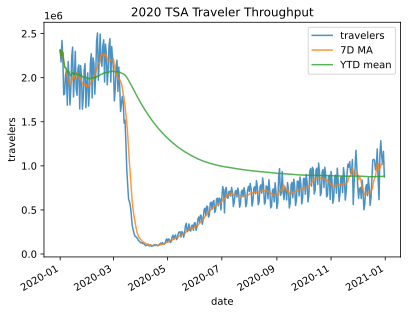

In [88]:
tsa_melted_holiday_travel.drop(columns='year').loc['2020'].assign(
    **{
        '7D MA': lambda x: x.travelers.rolling('7D').mean(),
        'YTD mean': lambda x: x.travelers.expanding().mean()
      }
).plot(title='2020 TSA Traveler Throughput', ylabel='travelers', alpha=0.8)

O `plot()` retorna um objeto classificado como __Axes__ que pode ser modificado posteriormente.

### Bar plots

Para nosso próximo exemplo, traçaremos barras verticais para comparar o rendimento mensal de viajantes da TSA ao longo dos anos. Vamos começar criando uma tabela dinâmica com as informações que precisamos:

In [89]:
plot_data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='sum')
plot_data.head()

year,2019,2020,2021
month,,,
1,59405722.0,61930286.0,23598230.0
2,57345684.0,60428859.0,24446345.0
3,72530252.0,32995003.0,38050060.0
4,70518994.0,3322548.0,41826159.0
5,74617773.0,7244733.0,NaN


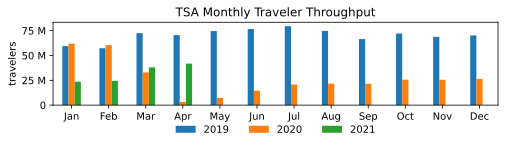

In [90]:
import calendar
from matplotlib import ticker

ax = plot_data.plot(
    kind='bar', rot=0, xlabel='', ylabel='travelers',
    figsize=(8, 1.5), title='TSA Monthly Traveler Throughput'
)

# use abreviações de mês para as marcas no eixo x
ax.set_xticklabels(calendar.month_abbr[1:])

# mostrar rótulos do eixo y em milhões em vez de notação científica
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# personalizar a legenda
ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.3), ncols=3, frameon=False)

### Plotando distribuições

Vamos agora comparar a distribuição do fluxo diário de viajantes da TSA ao longo dos anos. Criaremos uma subtrama para cada ano com um histograma e uma estimativa de densidade do kernel (KDE) da distribuição. O Pandas gerou os objetos __Figura__ e __Axes__ para ambos os exemplos até agora, mas podemos construir layouts personalizados criando-os nós mesmos com Matplotlib usando a função `plt.subplots()`. Primeiro, precisaremos importar o __módulo pyplot__:

In [91]:
import matplotlib.pyplot as plt

Embora o pandas nos permita especificar que queremos subplots e seu layout (com os parâmetros `subplots` e `layout`, respectivamente), usar Matplotlib para criar as subplots diretamente nos dá flexibilidade adicional:

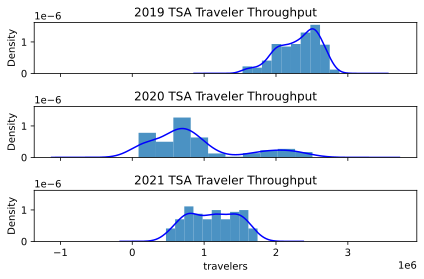

In [92]:
# definir o layout da subtrama
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6, 4))

for year, ax in zip(tsa_melted_holiday_travel.year.unique(), axes):
    plot_data = tsa_melted_holiday_travel.loc[str(year)].travelers
    plot_data.plot(kind='hist', legend=False, density=True, alpha=0.8, ax=ax)
    plot_data.plot(kind='kde', legend=False, color='blue', ax=ax)
    ax.set(title=f'{year} TSA Traveler Throughput', xlabel='travelers')

fig.tight_layout() # lidar com sobreposições

## <font color='blue'>Plotando com o Seaborn</font>

A biblioteca Seaborn fornece meios para visualizar facilmente dados de formato longo sem primeiro dinamizá-los. Além disso, ele também oferece alguns tipos de plotagem adicionais – mais uma vez construídos sobre o Matplotlib. Aqui, veremos alguns exemplos de visualizações que podemos criar com o Seaborn.

### Visualizando dados de formato longo

Com Seaborn, podemos especificar cores de plotagem de acordo com os valores de uma coluna com o parâmetro `hue`. Ao trabalhar com funções que geram subplots, também podemos especificar como dividir os subplots por valores de uma coluna de formato longo com os parâmetros `col` e `row`. Aqui, revisitamos a comparação da distribuição da taxa de transferência de viajantes da TSA ao longo dos anos:

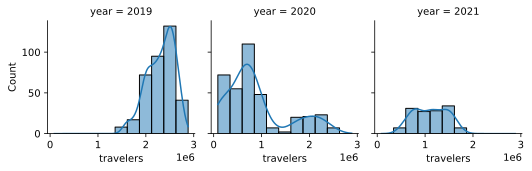

In [93]:
import seaborn as sns

sns.displot(
    data=tsa_melted_holiday_travel, x='travelers', col='year', kde=True, height=2.5
)

### Heatmaps

Podemos também usar o Seaborn para visualizar tabelas dinâmicas como mapas de calor:

In [94]:
data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='sum')

data

year,2019,2020,2021
month,,,
1,59405722.0,61930286.0,23598230.0
2,57345684.0,60428859.0,24446345.0
3,72530252.0,32995003.0,38050060.0
4,70518994.0,3322548.0,41826159.0
5,74617773.0,7244733.0,NaN
6,76619900.0,14481802.0,NaN
7,79511968.0,20740781.0,NaN
8,74776010.0,21708071.0,NaN
9,66531258.0,21488263.0,NaN


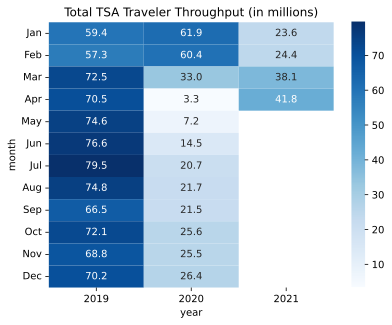

In [95]:
ax = sns.heatmap(data=data / 1e6, cmap='Blues', annot=True, fmt='.1f')
_ = ax.set_yticklabels(calendar.month_abbr[1:], rotation=0)
_ = ax.set_title('Total TSA Traveler Throughput (in millions)')

## <font color='blue'>Customizando plots com o Matplotlib</font>

Nesta seção final, discutiremos como usar Matplotlib para personalizar gráficos. Como há muitas funcionalidades disponíveis, abordaremos apenas como adicionar regiões sombreadas e anotações aqui.

### Adicionando regiões sombreadas

Ao analisar o gráfico do rendimento dos viajantes da TSA ao longo do tempo, é útil indicar os períodos durante os quais houve viagens de férias. Podemos fazer isso com o método `axvspan()`:

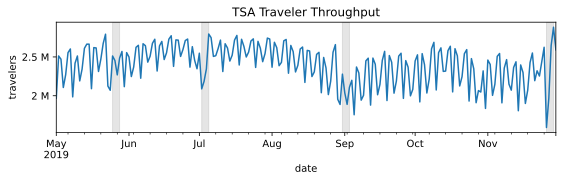

In [96]:
plot_data = tsa_melted_holiday_travel['2019-05':'2019-11']
ax = plot_data.travelers.plot(
    title='TSA Traveler Throughput', ylabel='travelers', figsize=(9, 2)
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# collect the holiday ranges (start and end dates)
holiday_ranges = plot_data.dropna().reset_index()\
    .groupby('holiday').agg({'date': ['min', 'max']})

# create shaded regions for each holiday in the plot
for start_date, end_date in holiday_ranges.to_numpy():
    ax.axvspan(start_date, end_date, color='gray', alpha=0.2)

### Adicionando anotações

Podemos usar o comando `annotate()` para adicionar anotações ao gráfico. Aqui, destacamos o dia de 2019 com maior movimentação de viajantes da TSA por exemplo, que foi o dia seguinte ao Dia de Ação de Graças:

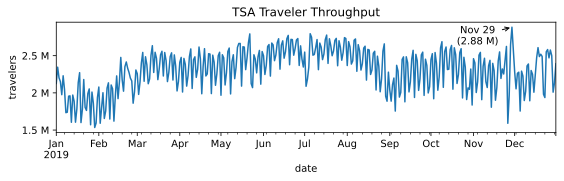

In [97]:
plot_data = tsa_melted_holiday_travel.loc['2019']
ax = plot_data.travelers.plot(
    title='TSA Traveler Throughput', ylabel='travelers', figsize=(9, 2)
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# highest throughput
max_throughput_date = plot_data.travelers.idxmax()
max_throughput = plot_data.travelers.max()
_ = ax.annotate(
    f'{max_throughput_date:%b %d}\n({max_throughput / 1e6:.2f} M)',
    xy=(max_throughput_date, max_throughput),
    xytext=(max_throughput_date - pd.Timedelta(days=25), max_throughput * 0.92),
    arrowprops={'arrowstyle': '->'}, ha='center'
)